# 목표
- 아이리스 데이터 셋으 ㄹ이용해서 꽃의 품종을 구분해보자
- 시각화까지 해보자 (scatter) 실습
- 상관관계, 생관계수 알아보기
- 하이퍼파라미터 튜닝 실습

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
# numpy
import numpy as np

In [2]:
## 한글 적용 가능 코드
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ='c:/Windows/Fonts/malgun.ttf')\
.get_name()
rc('font', family = font_name)

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print("iris_dataset의 키:\n", iris_dataset.keys())
#데이터 이해하기
print(iris_dataset['DESCR'][:193] + "\n...")
print("타깃의 이름:", iris_dataset['target_names'])
print("특성의 이름:\n", iris_dataset['feature_names'])
print("data의 타입:", type(iris_dataset['data']))
print("data의 크기:", iris_dataset['data'].shape)
print("data의 처음 다섯 행:\n", iris_dataset['data'][:5])
print("target의 타입:", type(iris_dataset['target']))
print("target의 크기:", iris_dataset['target'].shape)
print("타깃:\n", iris_dataset['target'])

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 타입: <class 'numpy.ndarray'>
data의 크기: (150, 4)
data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target의 타입: <class 'numpy.ndarray'>
target의 크기: (150,)
타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 데이터 이해하기

In [5]:
iris_dataframe = pd.DataFrame(iris_dataset["data"], columns=iris_dataset["feature_names"])

In [6]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 데이터 크기, 타입, 결측치 유무 알아보기

In [7]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### 정답 종류, 갯수 확인

In [8]:
iris_dataframe["label"]=iris_dataset["target"]
iris_dataframe["label"].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [9]:
display(iris_dataframe)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 기술통계확인하기

In [10]:
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 상관계수 확인하기
- 상관관계 : 두 변수 사이의 관계
    - 양의 상관관계 : 두 변수가 서로 비례
    - 음의 상관관계 : 두 변수가 서로 반비례
- 상관계수 : 두 변사 사이의 관계를 수치화 한것 (-1 ~ 1)    


In [11]:
# 상관계수
iris_dataframe.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


# 성과 측정 : 훈련 데이터와 테스트 데이터 나누기

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [13]:
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (112, 4)
y_train 크기: (112,)
X_test 크기: (38, 4)
y_test 크기: (38,)


# 데이터 전처리

#### 데이터 시각화 하기
- scatter(산점도) 변수사이의 관계 분포를 확인하는 그래프

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002029342EA60>,
      dtype=object)

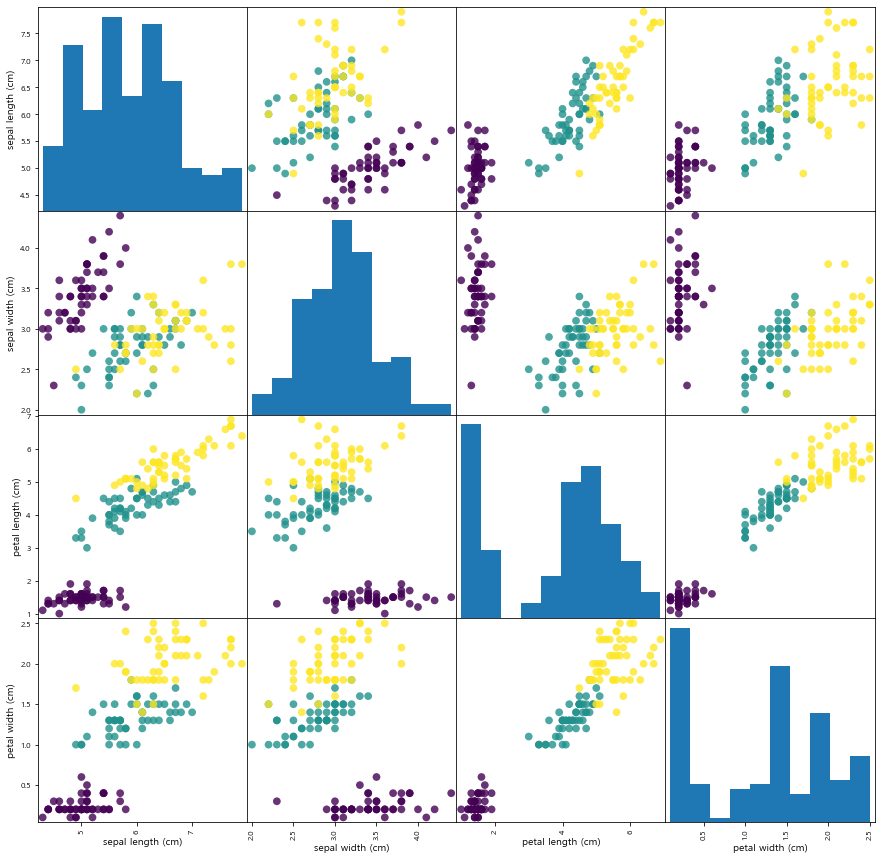

In [14]:
pd.plotting.scatter_matrix(
    iris_dataframe.iloc[:,0:4], # 산점도를 그릴 데이터
    figsize=(15,15), # 그림 가로세로 비율
    marker="o", # 점의 모양
    c=iris_dataframe["label"],
    alpha=.8,
    s=60
)

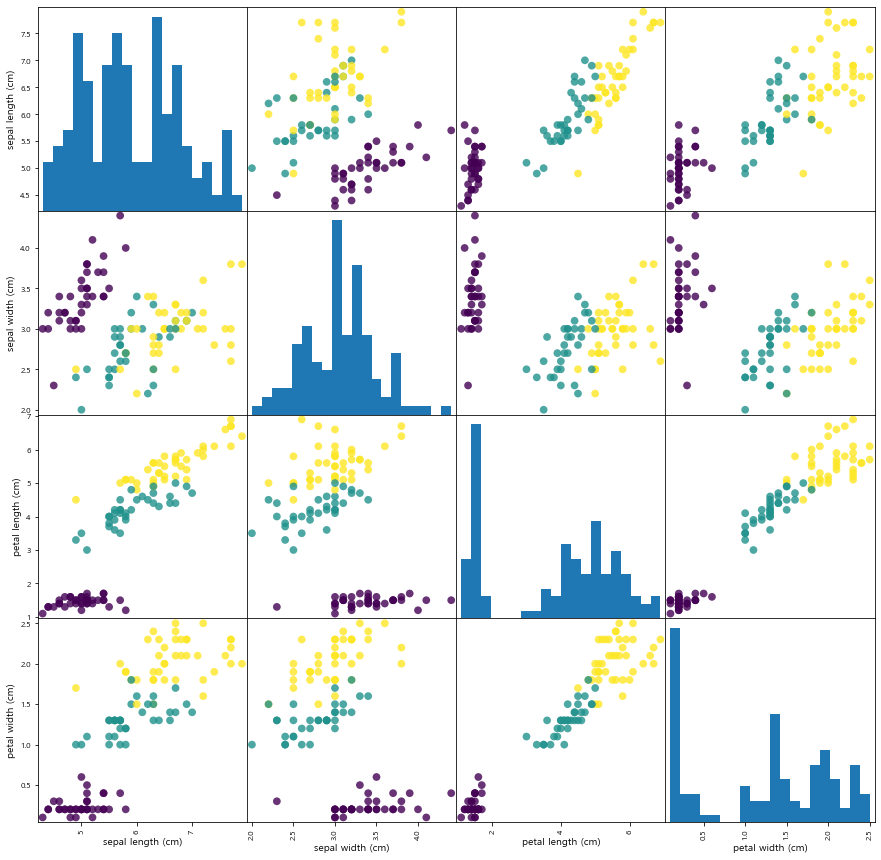

In [15]:
iris_df= pd.DataFrame(X_train, columns=iris_dataset["feature_names"])
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

# 첫번째 머신러닝 모델 : k-최근접 이웃 알고리즘

- 모델 정의 : knn
- 학습 : 문제 /답 구분 & 훈련/평가 데이터 구분
- 예측 
- 평가 :분류 평가 방법 사용

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

- 에측하기

In [17]:
X_test_new=np.array([[5,2.9,1,0.2]])
print(X_test_new.shape)

(1, 4)


In [18]:
pre=knn.predict(X_test_new)
print("예측:", pre)
print("예측한 타깃의 이름:", 
       iris_dataset['target_names'][pre])

예측: [0]
예측한 타깃의 이름: ['setosa']


# 모델평가하기

In [19]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [20]:
y_pre=knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pre)
#print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pre == y_test)))
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 세트의 정확도: 0.97


In [21]:
score=accuracy_score(y_test,y_pre)

In [22]:
print("정확도 : {:.2f}".format(score))

정확도 : 0.97


### 평가 정보를 세밀하게 확인해보자

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,y_pre ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# 하이퍼파라미터튜닝
- 최적의 k 값을 찾아보자

In [25]:
test_score_list=[] #이웃을 변경하면서 나오는 test 점수를 넣을리스트
train_score_list=[] # train 점수를 넣을 list
for k in range(1,90):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train) #훈련 데이터 학습
    test_pre=model.predict(X_test)#평가 데이터 예측
    test_score=accuracy_score(y_test,test_pre)# 테스트데이터의 정확도
    
    test_score_list.append(test_score)
    # 훈련 데이터에 대한 점수 계산
    train_score=model.score(X_train, y_train)
    train_score_list.append(train_score)
    

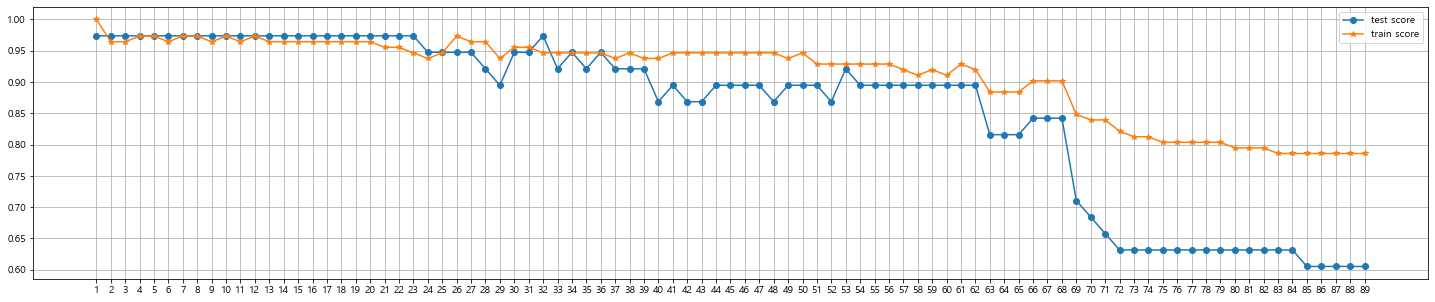

In [26]:
plt.figure(figsize=(25,5))
plt.plot(range(1,90), test_score_list, marker="o", label="test score")
plt.plot(range(1,90), train_score_list, marker="*", label="train score")
plt.xticks(range(1,90))
plt.grid()
plt.legend()
plt.show()



# 최종모델 마들기

In [27]:
final_iris_model=KNeighborsClassifier(n_neighbors=11)
final_iris_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [28]:
final_iris_model.score(X_train,y_train)

0.9642857142857143

# 요약

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=210)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 1.00
